In [2]:
# TODO: Optimize MCMC code to run faster using parallelization or multithreading
# TODO: Add detailed docstrings to all functions and classes for better code documentation
# TODO: Implement unit tests
# TODO: Add more flexible parameter grid options for the models
# TODO: Investigate old code to understand why Spearman's rho used to be higher and orders were closer to the ideal order

import sys
import os

parent_dir = os.path.dirname(os.path.dirname(os.path.abspath(__file__))) if '__file__' in globals() else os.path.abspath(os.path.join(os.getcwd(), os.pardir))
simulation_class_path = os.path.join(parent_dir, "simulation_class")
sys.path.append(simulation_class_path)

import numpy as np
from simulation_class.canonical_generator import CanonicalGenerator
from simulation_class.sample_generator import SampleGenerator
from simulation_class.disease_progression_analyzer import DiseaseProgressionAnalyzer
from simulation_class.EBMAnalyzer import EBMAnalyzer

### `inverse sigmoid`

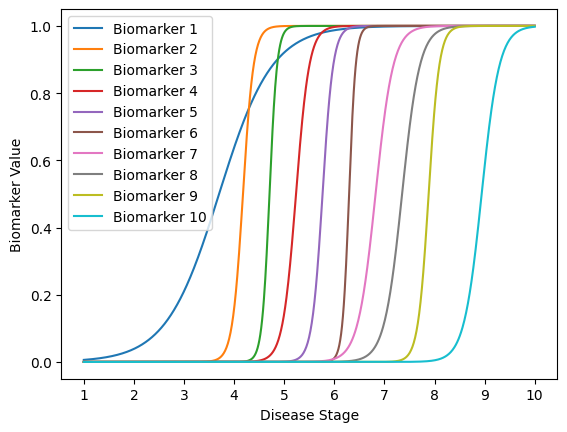

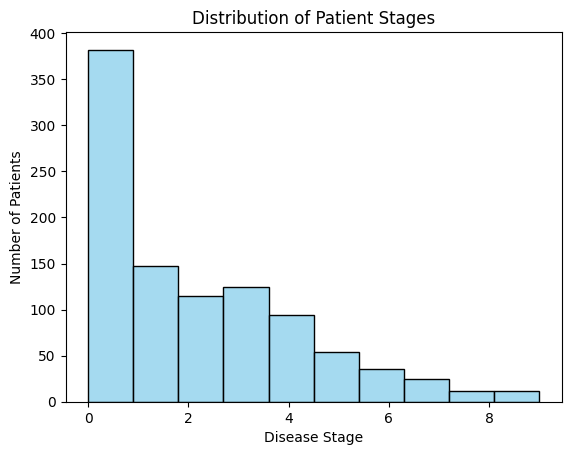

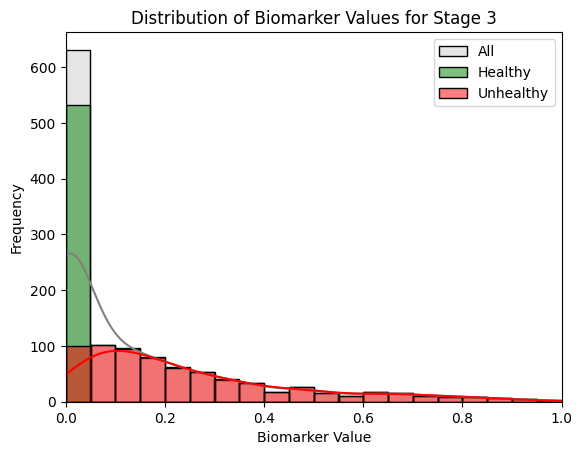

In [2]:
# model parameters
n_stages = 10
model_type = 'inverse_sigmoid'
biomarkers_params_sigmoid = {
    0: {'s': 0.1, 'c': 1.0},
    1: {'s': 0.5, 'c': 10.0},
    2: {'s': 0.7, 'c': 20.0},
    3: {'s': 0.4, 'c': 30.0},
    4: {'s': 0.5, 'c': 40.0},
    5: {'s': 0.8, 'c': 50.0},
    6: {'s': 0.3, 'c': 60.0},
    7: {'s': 0.3, 'c': 70.0},
    8: {'s': 0.5, 'c': 80.0},
    9: {'s': 0.3, 'c': 90.0},
    9: {'s': 0.3, 'c': 100.0},
}

# generate the canonical model
sigmoid_model = CanonicalGenerator(n_stages, model_type, biomarkers_params=biomarkers_params_sigmoid)
sigmoid_values = sigmoid_model.get_stage_values()

# plot disease progression
sigmoid_model.plot_disease_progression()

# generate patient samples
n_patients = 1000   
sample_generator = SampleGenerator(sigmoid_values,
                                   n_patients,
                                   dist_params={'loc': 1.5, 'scale': 3, 'random_state': 2},
                                   add_noise=True,
                                   noise_std=0.2,
                                   random_state=2)

patient_samples = sample_generator.get_sample()
patient_samples.head(10)

# plot stage histogram
sample_generator.plot_stage_histogram()
sample_generator.plot_biomarker_distribution(stage = 3)

In [3]:
# run analysis
X = sample_generator.get_X()
y = sample_generator.get_y()

analyzer = DiseaseProgressionAnalyzer(X, y)
likelihood_matrix = analyzer.run_analysis('ebm')

# get parameters including spearman's rho
params = analyzer.ebm_analyzer.get_params()
rho = params['spearman_rho']
print("Spearman's rho:", rho)

Starting Order: [4 3 8 5 6 0 2 9 7 1], kendall-tau:-0.022222222222222223


100%|██████████| 10000/10000 [00:02<00:00, 3652.72it/s]


Greedy Ascent Result: [9 7 6 5 3 4 2 1 0 8]


100%|██████████| 500000/500000 [02:18<00:00, 3604.08it/s]


AttributeError: 'list' object has no attribute 'shape'

### `sigmoid`

In [4]:
# model parameters
n_stages = 10
model_type = 'sigmoid'
biomarkers_params_sigmoid = {
    0: {'s': 0.1, 'c': 1.0},
    1: {'s': 0.5, 'c': 10.0},
    2: {'s': 0.7, 'c': 20.0},
    3: {'s': 0.4, 'c': 30.0},
    4: {'s': 0.5, 'c': 40.0},
    5: {'s': 0.8, 'c': 50.0},
    6: {'s': 0.3, 'c': 60.0},
    7: {'s': 0.3, 'c': 70.0},
    8: {'s': 0.5, 'c': 80.0},
    9: {'s': 0.3, 'c': 90.0},
    9: {'s': 0.3, 'c': 100.0},
}

# generate the canonical model
sigmoid_model = CanonicalGenerator(n_stages, model_type, biomarkers_params=biomarkers_params_sigmoid)
sigmoid_values = sigmoid_model.get_stage_values()

# plot disease progression
sigmoid_model.plot_disease_progression()

# generate patient samples
n_patients = 1000   
sample_generator = SampleGenerator(sigmoid_values,
                                   n_patients,
                                   dist_params={'loc': 1.5, 'scale': 3, 'random_state': 2},
                                   add_noise=True,
                                   noise_std=0.2,
                                   random_state=2)

patient_samples = sample_generator.get_sample()
patient_samples.head(10)

# plot stage histogram
sample_generator.plot_stage_histogram()
sample_generator.plot_biomarker_distribution(stage = 3)

In [5]:
# run analysis
X = sample_generator.get_sample()[0]
y = sample_generator.get_sample()[1]

analyzer = DiseaseProgressionAnalyzer(X, y)
likelihood_matrix = analyzer.run_analysis('ebm')

# get parameters including spearman's rho
params = analyzer.ebm_analyzer.get_params()
rho = params['spearman_rho']
print("Spearman's rho:", rho)

Starting Order: [8 5 2 1 9 7 6 0 4 3], kendall-tau:-0.28888888888888886


100%|██████████| 10000/10000 [00:05<00:00, 1670.08it/s]


Greedy Ascent Result: [9 8 7 6 5 4 3 2 1 0]


100%|██████████| 500000/500000 [03:25<00:00, 2430.57it/s]

[0 1 2 3 4 5 6 7 8 9]
[9 8 7 6 5 4 3 2 1 0]
Spearman's rho: -0.9999999999999999


### TRANSITION MATRIX demo

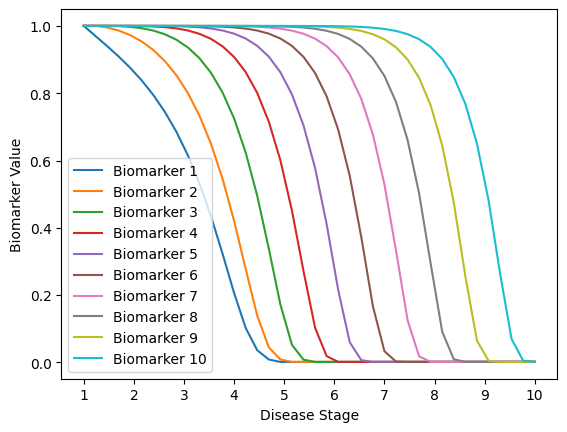

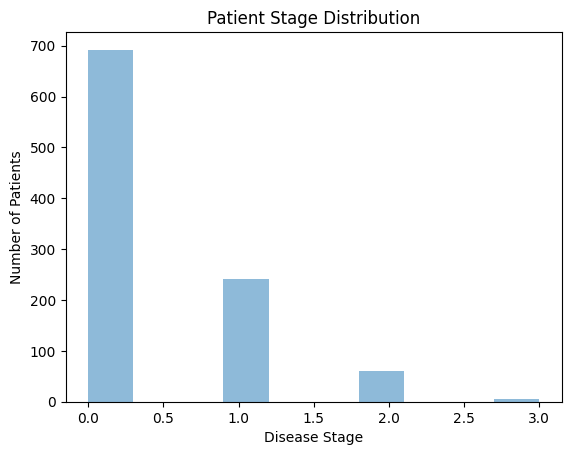

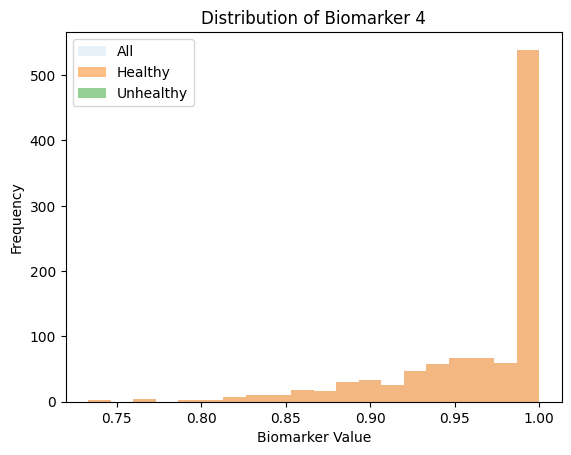

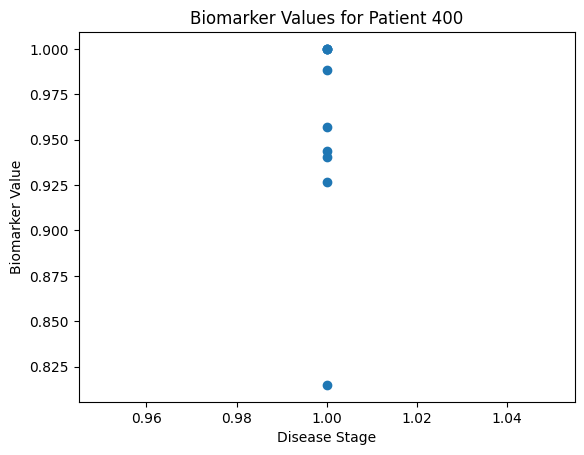

In [10]:
# model parameters
n_biomarker_stages = 10
model_type = 'transition_matrix'
biomarkers_params_transition = {'coeff': 1.5e-1}

# generate the canonical model
transition_model = CanonicalGenerator(n_biomarker_stages, model_type, biomarkers_params=biomarkers_params_transition)
transition_model.plot_disease_progression() # plot disease progression

stage_values = transition_model.get_stage_values()

# generate patient samples
sample_generator = SampleGenerator(stage_values, n_patients = 1000, add_noise=True, noise_std = 0.08, random_state=2)
patient_samples = sample_generator.patient_samples

# plotting methods
sample_generator.plot_stage_histogram()
sample_generator.plot_biomarker_distribution(biomarker_index = 3, healthy_stage_threshold=3)
sample_generator.plot_patient_biomarkers(patient_index=400)

In [6]:
print(canonical_generator.model_values.shape)
print(canonical_generator.stage_values.shape)

(10, 40)
(10, 10)


In [ ]:
analyzer = DiseaseProgressionAnalyzer(patient_samples)
likelihood_matrix = analyzer.run_analysis('ebm')

# get parameters including spearman's rho
params = analyzer.ebm_analyzer.get_params()
rho = params['rho']
print("Spearman's rho values:", rho)

# print orders
analyzer.print_orders()

100%|██████████| 10000/10000 [00:02<00:00, 3705.37it/s]


Greedy Ascent Result: [3 1 2 4 5 6 7 8 9 0]


100%|██████████| 500000/500000 [02:15<00:00, 3687.69it/s]

Spearman's rho values: 0.41818181818181815
First 10 MCMC sampled orders: [array([3, 2, 1, 4, 5, 6, 7, 8, 9, 0]), array([3, 1, 2, 4, 5, 6, 7, 8, 9, 0]), array([3, 2, 1, 4, 5, 6, 7, 8, 9, 0]), array([3, 1, 2, 4, 5, 6, 7, 8, 9, 0]), array([3, 2, 1, 4, 5, 6, 7, 8, 9, 0]), array([3, 1, 2, 4, 5, 6, 7, 8, 9, 0]), array([3, 2, 1, 4, 5, 6, 7, 8, 9, 0]), array([3, 1, 2, 4, 5, 6, 7, 8, 9, 0]), array([3, 2, 1, 4, 5, 6, 7, 8, 9, 0]), array([3, 1, 2, 4, 5, 6, 7, 8, 9, 0])]


## ODE demo

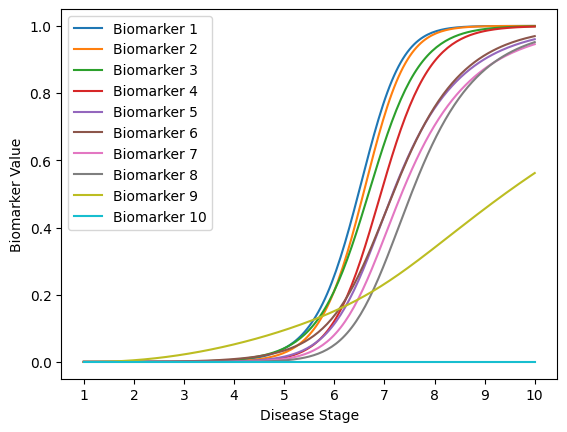

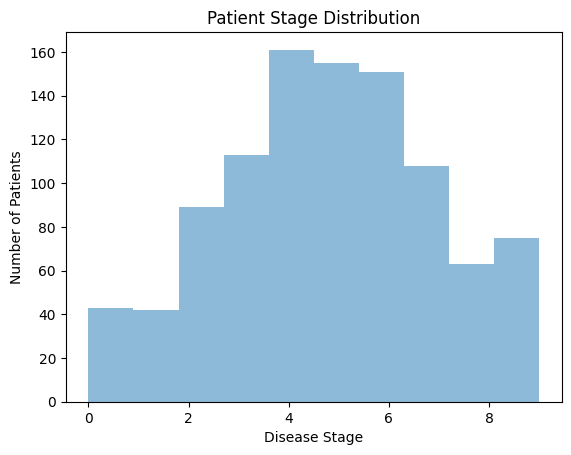

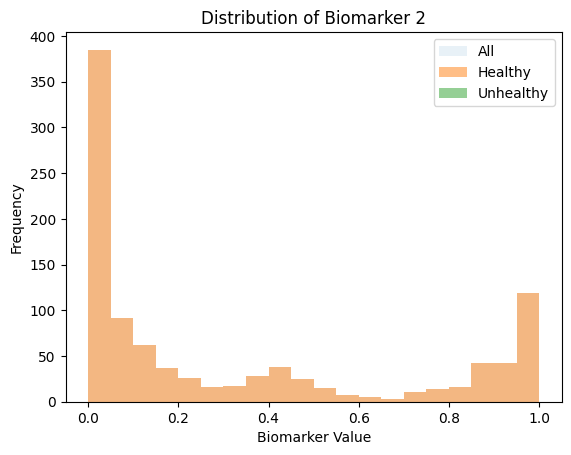

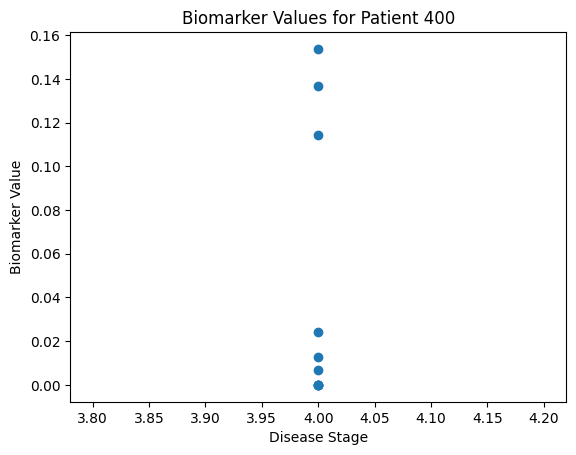

In [2]:
# TODO: add param grid options
# model parameters
n_biomarker_stages = 10
model_type = 'logistic'

# generate the canonical model
logistic_model = CanonicalGenerator(n_biomarker_stages, model_type)
logistic_model.plot_disease_progression()

# generate patient samples
sample_generator = SampleGenerator(,n_patients = 1000, add_noise=True, noise_std=0.1, random_state=2, skewness=-1)
patient_samples = sample_generator.patient_samples

# plot stage histogram
sample_generator.plot_stage_histogram()
sample_generator.plot_biomarker_distribution(biomarker_index=1, healthy_stage_threshold=1)
sample_generator.plot_patient_biomarkers(patient_index=400)


(10, 203)
(10, 10)
0.9999999992505652
0.9999998646716644


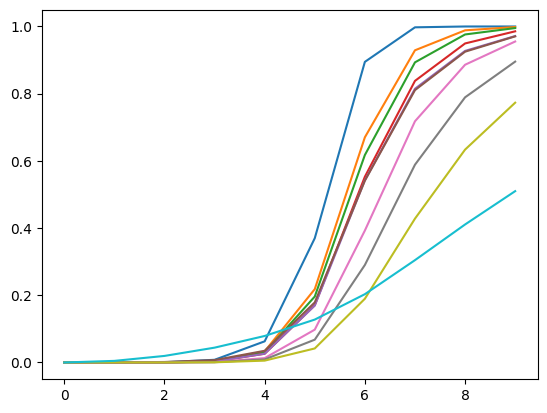

In [4]:
import seaborn as sns
print(canonical_generator.model_values.shape)
print(canonical_generator.stage_values.shape)

print(canonical_generator.model_values.max())
print(canonical_generator.stage_values.max())

for marker in canonical_generator.stage_values[:]:
    sns.lineplot(marker)

In [3]:
analyzer = DiseaseProgressionAnalyzer(patient_samples)
likelihood_matrix = analyzer.run_analysis('ebm')

# get parameters including spearman's rho
params = analyzer.ebm_analyzer.get_params()
rho = params['rho']
print("Spearman's rho values:", rho)

# print orders
analyzer.print_orders()

100%|██████████| 10000/10000 [00:02<00:00, 3657.43it/s]


Greedy Ascent Result: [8 2 0 1 3 4 5 6 7 9]


100%|██████████| 500000/500000 [02:17<00:00, 3639.70it/s]

Spearman's rho values: 0.5272727272727272
First 10 MCMC sampled orders: [array([8, 2, 0, 3, 1, 4, 5, 6, 7, 9]), array([8, 2, 0, 1, 3, 4, 5, 6, 7, 9]), array([8, 2, 0, 3, 1, 4, 5, 6, 7, 9]), array([8, 2, 0, 1, 3, 4, 5, 6, 7, 9]), array([8, 2, 0, 3, 1, 4, 5, 6, 7, 9]), array([8, 2, 0, 1, 3, 4, 5, 6, 7, 9]), array([8, 2, 0, 3, 1, 4, 5, 6, 7, 9]), array([8, 2, 0, 1, 3, 4, 5, 6, 7, 9]), array([8, 2, 0, 1, 3, 5, 4, 6, 7, 9]), array([8, 2, 0, 3, 1, 5, 4, 6, 7, 9])]


In [4]:
best_order = params['best_order']
print(best_order)

[8 2 0 1 3 4 5 6 7 9]
